In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import data_import
import gmaps
import country_converter as coco

In [44]:
rest_df = data_import.get_rest_countries()

In [45]:
cia_df = data_import.get_cia_data()

In [46]:
#drop NaN values
new_cia = cia_df.dropna(subset=['internet_users'])


In [47]:

#check if country in rest_df is in cia_df

in_cia = rest_df.assign(In_new_cia=rest_df.country.isin(new_cia.country).astype(int))

list_cia = in_cia.loc[in_cia['In_new_cia'] == 0]


64

In [49]:
in_rest = new_cia.assign(In_rest_df=new_cia.country.isin(rest_df.country).astype(int))

list_rest= in_rest.loc[in_rest['In_rest_df'] == 0]


In [50]:
merged_data = pd.merge(rest_df, new_cia, how = 'inner', on = 'country')

In [51]:
merged_data.to_csv("merged_data.csv")

<h1> Josh's Workspace </h1>

In [52]:
pop_low = merged_data["population"].quantile(0.1)
pop_hi  = merged_data["population"].quantile(0.90)
edu_low = merged_data['education_expenditures'].quantile(0.01)
edu_hi = merged_data['education_expenditures'].quantile(0.99)


df_filtered = merged_data[(merged_data["population"] < pop_hi) & (merged_data["population"] > pop_low) & (merged_data['education_expenditures'] > edu_low) & (merged_data['education_expenditures'] < edu_hi)]

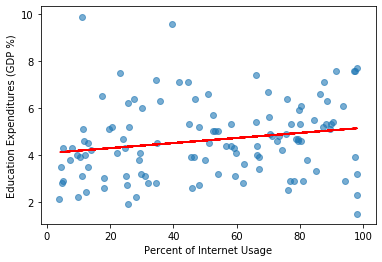

In [53]:
z = np.polyfit(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], 1)
p = np.poly1d(z)

plt.plot(df_filtered['internet_%_of_population'],p(df_filtered['internet_%_of_population']),"r--")
plt.scatter(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], alpha = .6)
plt.xlabel('Percent of Internet Usage')
plt.ylabel('Education Expenditures (GDP %)')

plt.show()

In [54]:
sub_df = df_filtered[['sub-region', 'internet_%_of_population', 'median_age', 'education_expenditures']]

In [55]:
sub_df = sub_df.groupby('sub-region').mean()

In [56]:
sub_df.head()

,internet_%_of_population,median_age,education_expenditures
sub-region,,,
Australia and New Zealand,88.350000,38.450000,5.800000
Caribbean,61.414286,34.571429,4.814286
Central America,40.385714,26.357143,4.942857
Central Asia,39.320000,27.980000,4.940000
Eastern Africa,24.375000,21.841667,4.525000


In [61]:
# gmaps.configure(api_key = api_keys.google_key)

In [62]:
# countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

# fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)
# fig

In [63]:
# pprint(countries_geojson['features'][0]['properties'])

In [64]:
# len(countries_geojson['features'])

<h1>Daniela's Workspace</h1>

In [65]:
world = new_cia.iloc[[0]]
world


,country,population,internet_users,internet_%_of_population,internet_global_rank,telephones_fixed_lines,telephone_mobile_cellular,median_age,gdp_purchasing_power_parity,gdp_global_rank,education_expenditures,education_expeditures_global_rank
0,World,7.503828e+09,3.174000e+09,43.0,NaN,984289950,7.806143e+09,30.6,1.278000e+14,NaN,NaN,NaN


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

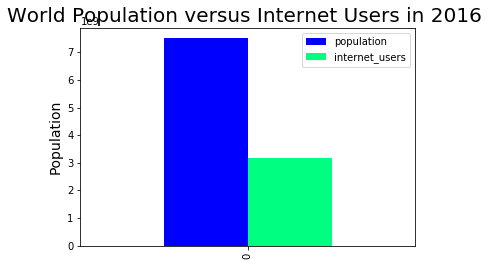

In [66]:
#plot World Population versus Internet Users

world = world[['population', 'internet_users']]
                        
world.plot(kind='bar',
           colormap='winter',
          sharex=True,
          )
plt.title("World Population versus Internet Users in 2016 ",fontsize= 20)
plt.ylabel("Population", fontsize=14)
plt.xlabel()
plt.legend(['Population', "Internet Users"])

plt.show()


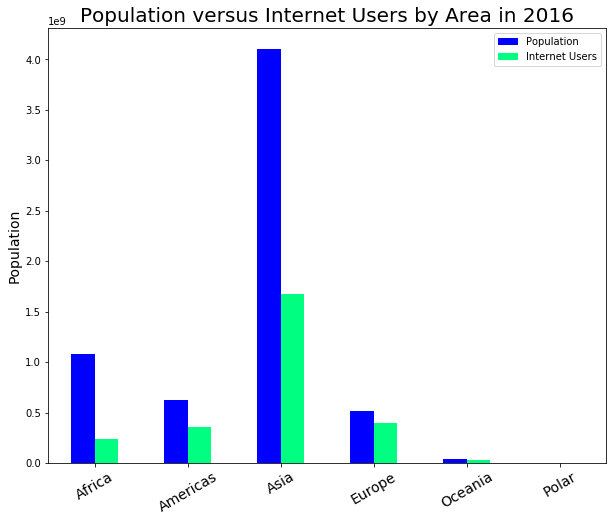

In [67]:
# Population versus Internet users by area
per_sub_area = (merged_data[['region', 'population', 'internet_users']]).groupby(['region']).sum()

#plot
per_sub_area.plot(kind="bar",
                  colormap='winter',
                  figsize=(10,8)
                 )              
                      
plt.title('Population versus Internet Users by Area in 2016', fontsize=20)
plt.ylabel("Population", fontsize=14)
plt.xlabel('')
plt.legend(['Population', "Internet Users"]);
plt.xticks(rotation =30,fontsize =14)

plt.show()

In [68]:
per_sub_area

,population,internet_users
region,,
Africa,1.078043e+09,2.341930e+08
Americas,6.275328e+08,3.603579e+08
Asia,4.105089e+09,1.670888e+09
Europe,5.199933e+08,3.969583e+08
Oceania,3.831227e+07,2.617984e+07
Polar,0.000000e+00,4.400000e+03


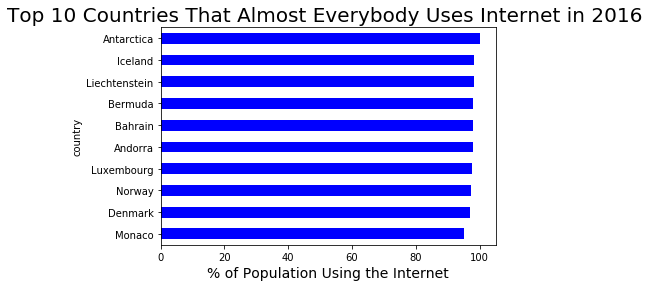

In [69]:
# What countries have almost 100% of their population using the Internet?


top_perc_internet_population = merged_data[['country', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=False)\
                            .head(10)\
                            .sort_values(by=['internet_%_of_population'], ascending=True)\
                           .set_index('country')
                            

top_perc_internet_population.plot(kind='barh',
                                 use_index='True',
                                 legend=False,
                                 colormap='winter'
                             )

plt.title("Top 10 Countries That Almost Everybody Uses Internet in 2016 ", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)

plt.show()

In [70]:
rr = merged_data.max(level='internet_%_of_population')

ValueError: level name internet_%_of_population is not the name of the index

In [71]:
# # check top population, internet_users, gdp and education

# top_population = merged_data[['country','population', 'median_age']]\
#                             .sort_values(by=['population'],ascending=False)\
#                             .head(25)

# top_internet = merged_data[['country', 'internet_users']]\
#                             .sort_values(by=['internet_users'], ascending=False)\
#                             .head(20)\
#                             .set_index('country')

# top_gdp = merged_data[['country', 'gdp_global_rank']]\
#                             .sort_values(by=['gdp_global_rank'], ascending=True)\
#                             .head(10)

# top_education = merged_data[['country', 'education_expenditures']]\
#                             .sort_values(by=['education_expenditures'], ascending=False)\
#                             .head(25)

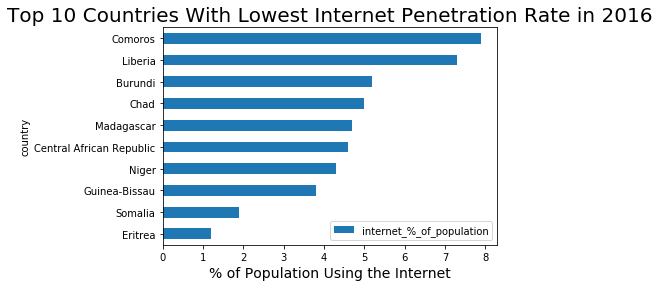

In [72]:
# What countries have the lowest Internet penetration rate in 2016?

less_perc_internet_population = merged_data[['country', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=True)\
                            .head(10)\
                            .set_index('country')


less_perc_internet_population.plot(kind='barh')

plt.title("Top 10 Countries With Lowest Internet Penetration Rate in 2016", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)

plt.show()




<h1>Cesar's Workspace</h1>

<h1>Claudia's Workspace</h1>